##Método 1##
Se ingeresan los puntos de la mitad superior, y se realiza una vaz más con los de la mitad inferior que se ajustan con lagrange y se suman los resultados.

In [ ]:
import numpy as np


def prod(A):
    a = 1
    for i in range(len(A)):
        a = a * A[i]
    return a


def lagrange(a, n):
    results = []
    lfun = np.arange((len(a[0])) ** 2, dtype=float)
    lfun.shape = (len(a[0]), len(a[0]))

    for i in range(len(a[0])):
        for j in range(len(lfun)):
            if i == j:
                lfun[i, j] = 1
            else:
                lfun[i, j] = (n - a[0][j]) / (a[0][i] - a[0][j])
    for i in range(len(a[1])):
        results.append(prod(lfun[i]) * a[1][i])

    return sum(results)


def main():
    cantPoints = int(input("Ingrese cantidad de puntos conocidos> "))
    if cantPoints < 2:
        print("\nCANTIDAD DE PUNTOS CONOCIDOS >= 2\n")
        main()

    integs = []
    points = [[], []]
    midPoints = [[], []]

    for i in range(cantPoints):
        print ("\n( x", i, ",y", i, ")")
        x = float(input("Ingrese 'x'> "))
        y = float(input("Ingrese 'y'> "))
        points[0].append(x)
        points[1].append(y)

    for i in range(len(points[0]) - 1):
        midPoints[0].append((points[0][i + 1] + points[0][i]) / 2)
        midPoints[1].append(lagrange(points, midPoints[0][i]))

    for i in range(len(midPoints[0])):
        intg = ((points[0][i + 1] - points[0][i]) / 6) * \
               (points[1][i] + (4 * midPoints[1][i]) + points[1][i + 1])
        integs.append(intg)

    print ("\n\tIntegral: ", sum(integs))


print("\n\tREGLA DE SIMPSON\n\n")
main()

Resultado: 302.15755208333331

##Método 2##
 Se obtienen las funciones con polyfit y se integra la resta de las funciones  

          2
-0.03406 x + 1.067 x + 1.003
0.9523926591245349 

         2
0.01356 x - 0.4461 x - 0.2703
0.7793127865629343 



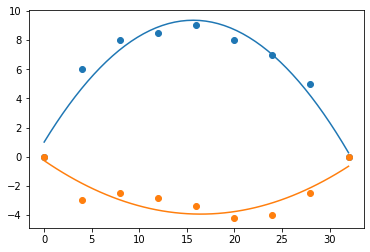

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

x1 = np.array([0,4,8,12,16,20,24,28,32])
y1 = np.array([0,6,8,8.5,9,8,7,5,0])
x2 = np.array([0,4,8,12,16,20,24,28,32])
y2 = np.array([0,-3,-2.5,-2.8,-3.4,-4.2,-4,-2.5,0])

mymodel1 = np.poly1d(np.polyfit(x1, y1, 2))
myline1 = np.linspace(0, 32, 50)
mymodel2 = np.poly1d(np.polyfit(x2, y2, 2))
myline2 = np.linspace(0, 32, 50)

print(mymodel1)
print(r2_score(y1, mymodel1(x1)),'\n')

print(mymodel2)
print(r2_score(y2, mymodel2(x2)),'\n')

plt.scatter(x1, y1)
plt.scatter(x2, y2)
plt.plot(myline1, mymodel1(myline1))
plt.plot(myline2, mymodel2(myline2))
plt.show()

In [12]:
#Importamos math
from math import *
 
#Definimos la funcion
#@ n: numero de x
#@ a y b los intervalos de la integral
#@ f: La funcion a integrar
def simpson13(n, a, b, f):
    #calculamos h
    h = (b - a) / n
    #Inicializamos nuestra varible donde se almacenara las sumas
    suma = 0.0
    #hacemos un ciclo para ir sumando las areas
    for i in range(1, n):
        #calculamos la x
        #x = a - h + (2 * h * i)
        x = a + i * h
        # si es par se multiplica por 4
        if(i % 2 == 0):
            suma = suma + 2 * fx(x, f)
        #en caso contrario se multiplica por 2
        else:
            suma = suma + 4 * fx(x, f)
    #sumamos los el primer elemento y el ultimo
    suma = suma + fx(a, f) + fx(b, f)
    #Multiplicamos por h/3
    rest = suma * (h / 3)
    #Retornamos el resultado
    return (rest)
 
#Funcion que nos ayuda a evaluar las funciones
def fx(x, f):
    return eval(f)
 
#valores de ejemplo para la funcion sin(x) con intervalos de
n = 8
a = 0.0
b = 32.0
f = '(-0.03406*x**2 + 1.067*x + 1.003) - (0.01356*x**2 - 0.4461*x - 0.2703)'
 
print(simpson13(n, a, b, f))

295.31541333333325


Resultado: 295.31541333333325 